k = 2, Silhouette Score = 0.148
k = 3, Silhouette Score = 0.134
k = 4, Silhouette Score = 0.144
k = 5, Silhouette Score = 0.144
k = 6, Silhouette Score = 0.133
k = 7, Silhouette Score = 0.107
k = 8, Silhouette Score = 0.098
k = 9, Silhouette Score = 0.100
k = 10, Silhouette Score = 0.105

✅ Mejor número de clústeres: k = 2 con Silhouette Score = 0.148


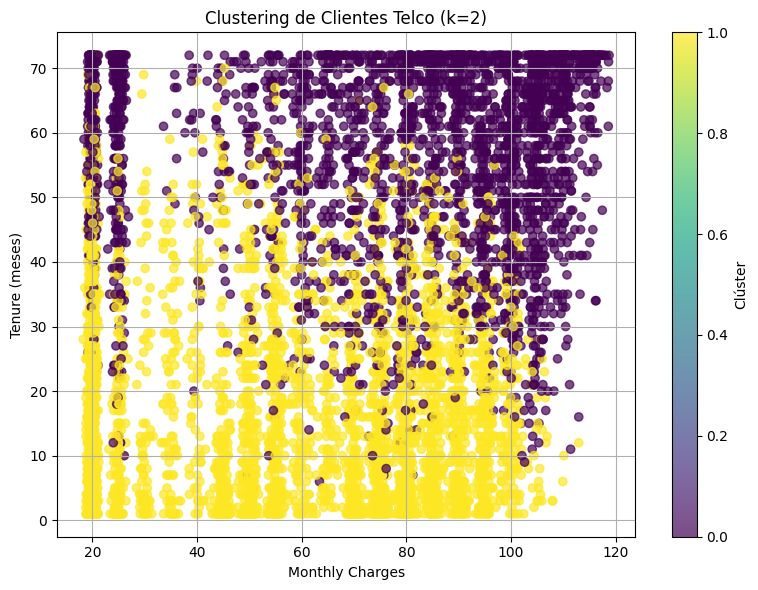

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Calcular Silhouette Score para varios k
sil_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

#Elegir mejor k
best_k = range_k[np.argmax(sil_scores)]
best_score = max(sil_scores)
print(f"\n✅ Mejor número de clústeres: k = {best_k} con Silhouette Score = {best_score:.3f}")

#Aplicar KMeans final
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    df["MonthlyCharges"],
    df["tenure"],
    c=clusters,           
    alpha=0.7
)

plt.title(f"Clustering de Clientes Telco (k={best_k})")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure (meses)")
plt.grid(True)
plt.colorbar(label="Clúster")
plt.tight_layout()
plt.show()


